# **1. Import the standard libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.svm import SVC

import torch
from torch.optim import Adam
from tqdm import tqdm

import torch
from torch import nn
from torch.nn import functional as F
from typing import Callable
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from copy import deepcopy

In [2]:
#Setting the random seed to a number so that results as reproducible
seed = 34
random.seed(seed)

In [3]:
use_cuda=torch.cuda.is_available()
device=torch.device("cuda" if use_cuda else "cpu")

# **2. Load the dataset**

In [4]:
#Read in the Dry Beans dataset for Machine Learning
df_dry_beans = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx', sheet_name='Dry_Beans_Dataset')
df_dry_beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


# **3. Exploratory Data Analysis**

In [5]:
#Print the shape (no. of rows and columns) in the dataset
df_dry_beans.shape

(13611, 17)

In [6]:
#Datatype of all the columns
df_dry_beans.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [7]:
df_dry_beans.columns.tolist()

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'Class']

In [8]:
#Useful statistics on the dataset
df_dry_beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [9]:
#Count the number of null values in the dataset
df_dry_beans.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [10]:
#Print the list of unique labels
df_dry_beans['Class'].unique().tolist()

['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

<Axes: title={'center': 'Count of records per class'}, xlabel='Class', ylabel='Count'>

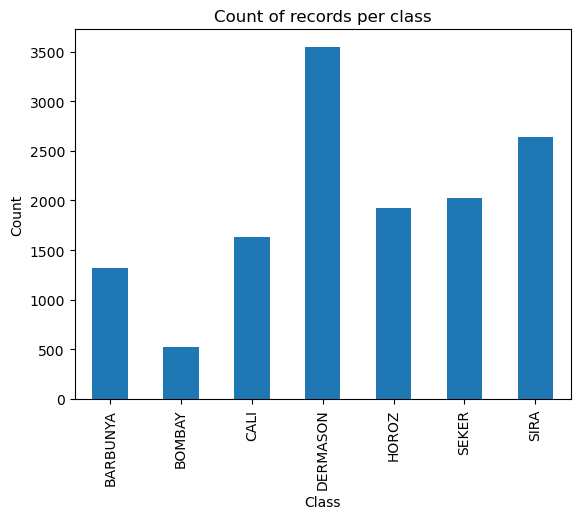

In [11]:
#Plot the label/class distribution in the dataset
df_dry_beans.groupby('Class')['Class'].count().plot(kind='bar', ylabel='Count', title='Count of records per class')

The input dataset - "Dry Beans" has 13611 records and 17 columns.

All of them are numeric (either int64 or float64) except the 'Class' column. The field 'Class' contains the different labels and the rest of the columns will be used as features to train the model.

There are no null values in the dataset. No type casting or null value replacement strategy is required.

There are 7 different labels in the dataset. Therefore, we will have to implement multi-class classification models.


**The dataset is not balanced, as some labels have disproportionate number of records compared to others. The class - 'Dermason' has almost seven times the numberof records as 'Bombay' which has the least number of records. Therefore, oversampling of the minority classes or undersampling of the majority class will have to be performed to make the dataset balanced.**

**I will be performing oversampling of the minority classes to balance the dataset**


[]

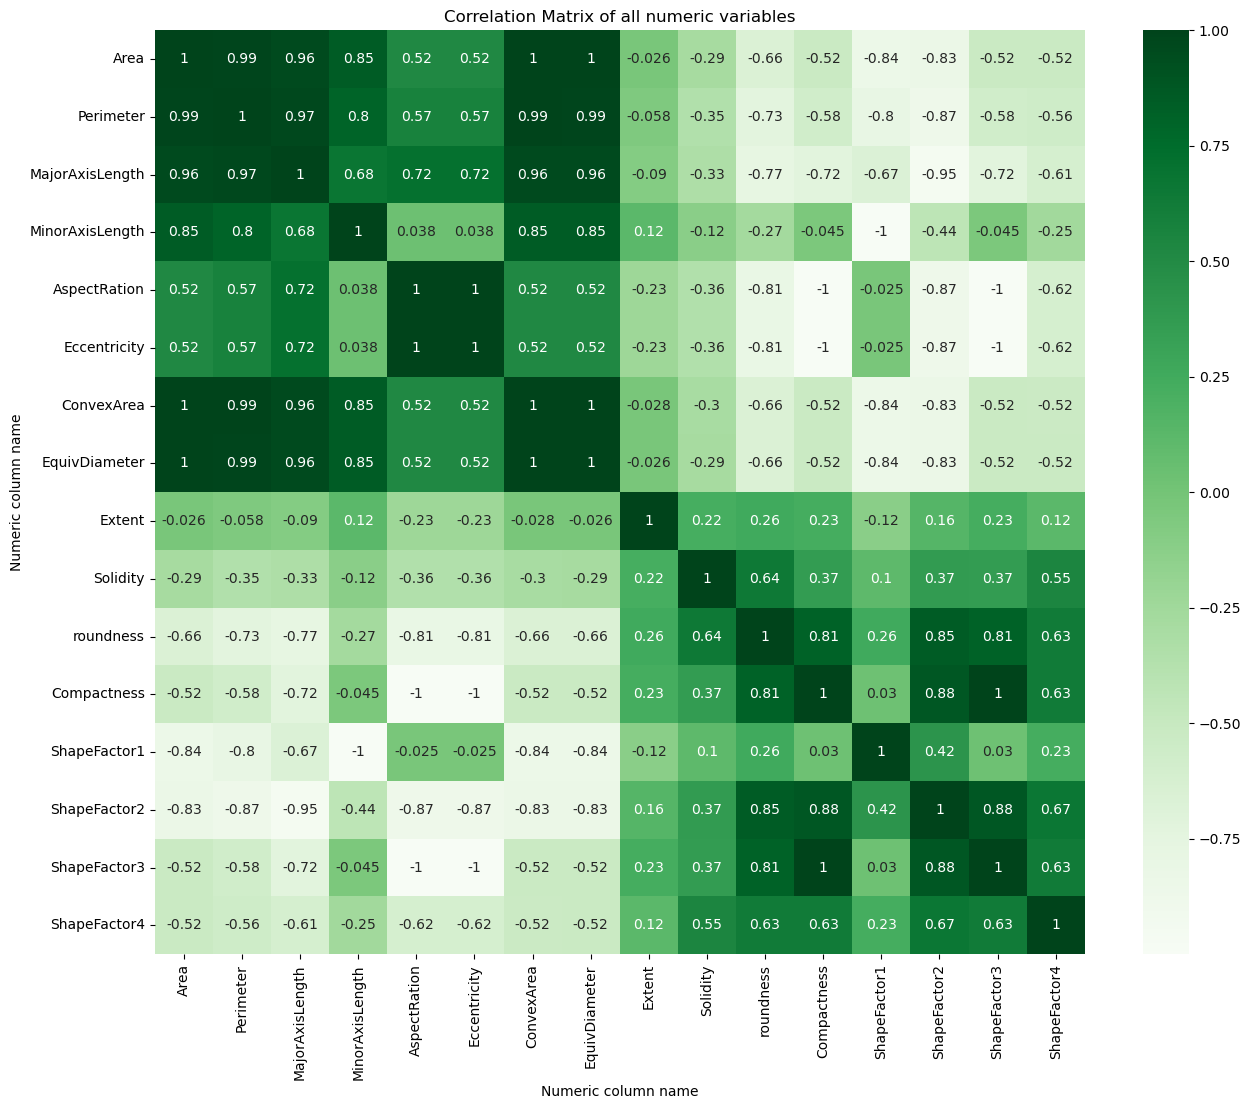

In [12]:
#Code adapted from Term 1 Data Science Research Methods Assignment Submission made by me.
#Plot the correlation matrix to get useful insights on the relationship between different columns in the dataset
correlationMatrix = df_dry_beans.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(15,12))
plt.title('Correlation Matrix of all numeric variables')
sns.heatmap(correlationMatrix, cmap="Greens",annot=True)
plt.xlabel('Numeric column name')
plt.ylabel('Numeric column name')
plt.plot()

**As can be seen from the correlation matrix, there is a high correlation among some numeric columns in the dataset**


The columns - 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter' are highly correlated to each other



In [13]:
def fn_plotBoxplot(feature, xlabel, ylabel='Value', figsize=(5,4)):   
    plt.figure(figsize=figsize)
    sns.boxplot(x=feature, showmeans=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Boxplot of {xlabel}')

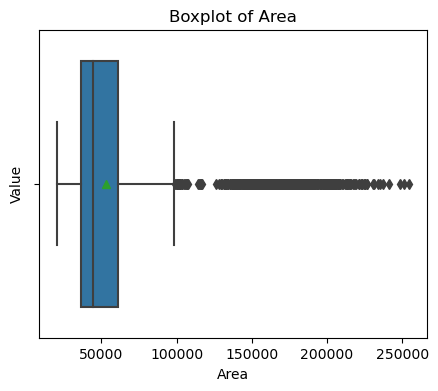

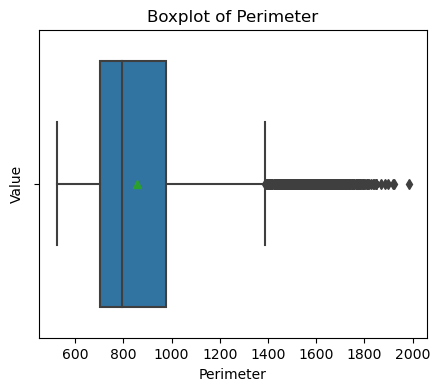

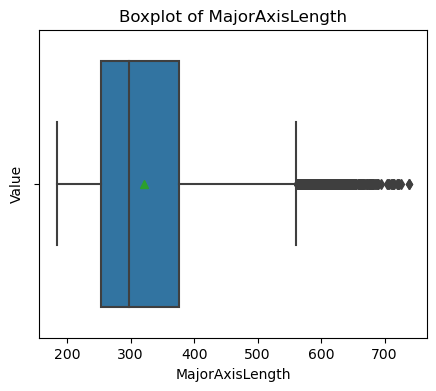

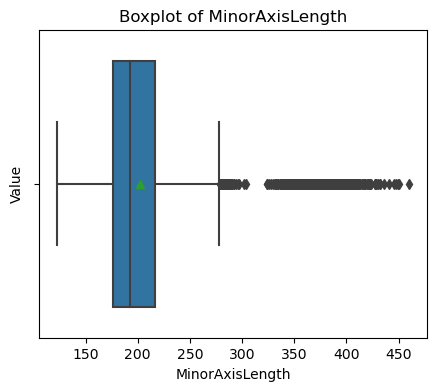

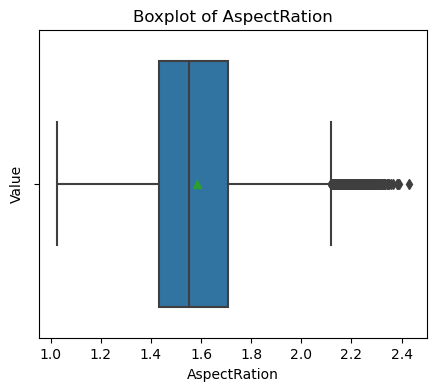

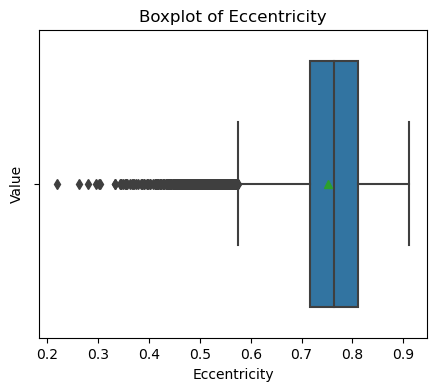

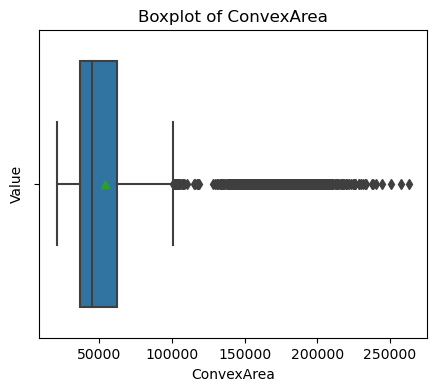

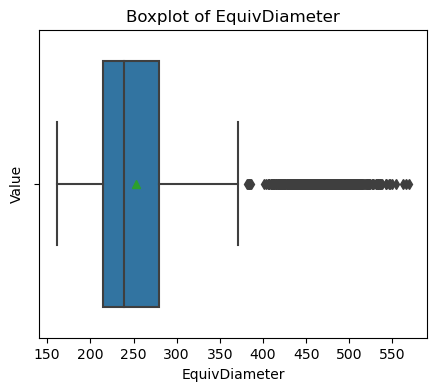

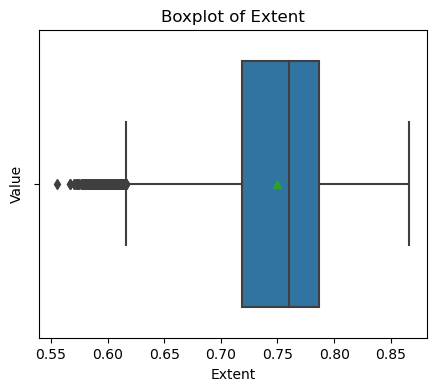

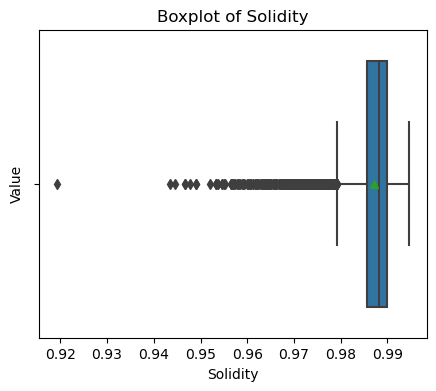

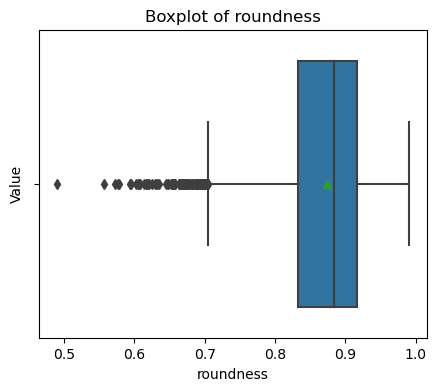

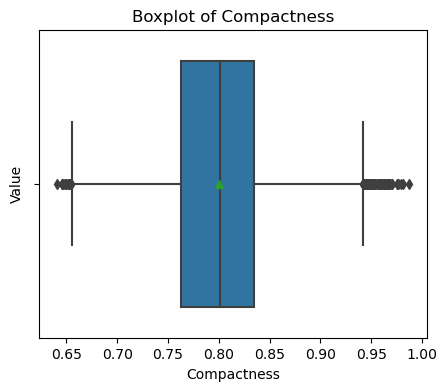

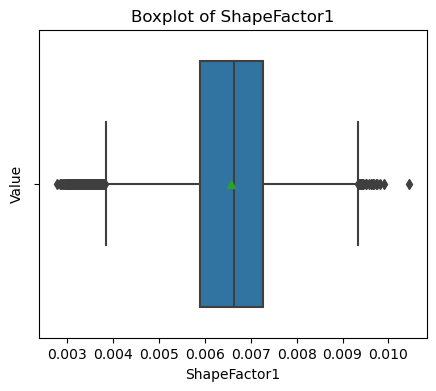

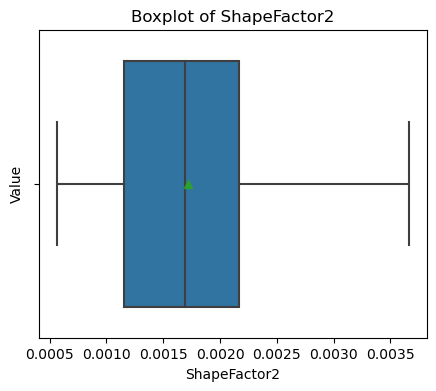

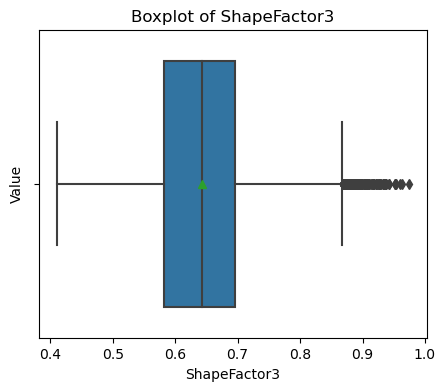

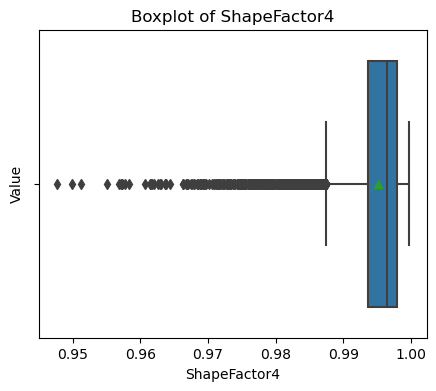

In [14]:
for feature_label in df_dry_beans.drop('Class', axis=1).columns.tolist():
    fn_plotBoxplot(df_dry_beans[feature_label], feature_label)

In [15]:
#Generate class label to numeric value mapping
label_value_mapping = { label:index for index, label in enumerate(sorted(df_dry_beans['Class'].unique().tolist()))}
label_value_mapping

#Generate a reverse mapping from numeric value to label
reverse_label_value_mapping = {val:key for key,val in label_value_mapping.items()}
reverse_label_value_mapping

{0: 'BARBUNYA',
 1: 'BOMBAY',
 2: 'CALI',
 3: 'DERMASON',
 4: 'HOROZ',
 5: 'SEKER',
 6: 'SIRA'}

In [16]:
label_value_mapping

{'BARBUNYA': 0,
 'BOMBAY': 1,
 'CALI': 2,
 'DERMASON': 3,
 'HOROZ': 4,
 'SEKER': 5,
 'SIRA': 6}

# **4. Data Transformations**

In [17]:
df_dry_beans_mapped = df_dry_beans.copy()
df_dry_beans_mapped['class_label'] = df_dry_beans_mapped['Class'].map(label_value_mapping)
df_dry_beans_mapped.drop('Class', axis=1, inplace=True)

In [18]:
X = df_dry_beans_mapped.drop('class_label', axis=1)
y = df_dry_beans_mapped['class_label']

In [19]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


## **4.1. Scaling/Normalising the dataset**

using RobustScaler 

The boxplots we have plotted earlier indicate that there are a lot of values within the dataset that are outliers, i.e. lie outside the IQR. StandardScaler is very sensitive to outliers and can't handle datasets well that contains a lot of outliers.

Therefore, I am using the RobustScaler for the purpose of scaling and normalising the features in the dataset.

In [20]:
scaler = RobustScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-0.65017597, -0.67466965, -0.72006053, ...,  1.4298116 ,
         1.67624885,  0.55936566],
       [-0.63661814, -0.57336142, -0.78218599, ...,  1.8392882 ,
         2.33590554,  0.48913066],
       [-0.61078227, -0.62417813, -0.68233051, ...,  1.33189556,
         1.60340157,  0.64125016],
       ...,
       [-0.10050392, -0.13014748, -0.12454962, ...,  0.19153187,
         0.30388609,  0.09123417],
       [-0.10018397, -0.11385895, -0.10959152, ...,  0.15588375,
         0.22845954, -0.27837705],
       [-0.09970405, -0.08295532, -0.01412945, ..., -0.0528344 ,
        -0.22524423,  0.42914758]])

## **4.2. Splitting the dataset into separate test and train sets**

In [21]:
all_ids = np.arange(0, X_scaled.shape[0])
train_set_ids, test_set_ids = train_test_split(all_ids, test_size=0.3, train_size=0.7, 
                                 random_state=seed, shuffle=True)

X_train = X_scaled[train_set_ids]
y_train = y[train_set_ids]

X_test = X_scaled[test_set_ids]
y_test = y[test_set_ids]


#train_set_ids_mlp, val_set_ids_mlp = train_test_split(train_set_ids, test_size=0.2, train_size=0.7, 
#                                 random_state=seed, shuffle=True)


#X_train_mlp = X_scaled[train_set_ids_mlp]
#y_train_mlp = y[train_set_ids_mlp]

#X_val_mlp = X_scaled[val_set_ids_mlp]
#y_val_mlp = y[val_set_ids_mlp]

#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=seed)

In [22]:
df_train_scaled = pd.DataFrame(X_train, columns=df_dry_beans.drop('Class', axis=1).columns.tolist())
df_train_scaled['class_label'] = y_train.tolist()
df_train_scaled['class_label'].unique()

array([3, 6, 5, 4, 2, 0, 1], dtype=int64)

In [23]:
df_train_scaled

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class_label
0,-0.638178,-0.547438,-0.398176,-1.087509,0.463783,0.409710,-0.630544,-0.734642,0.509430,-0.108067,-0.197060,-0.418031,1.452111,0.188424,-0.411695,0.503205,3
1,0.228443,0.231701,0.192083,0.251186,0.107943,0.106209,0.241678,0.229766,-0.806732,-1.767449,-0.284895,-0.157124,-0.204580,-0.161681,-0.156586,-2.351738,6
2,0.017317,-0.077785,-0.260013,0.595029,-1.201789,-2.017947,0.014035,0.017914,0.347964,0.412417,0.747980,1.439347,-0.561917,0.721126,1.537748,0.647182,5
3,0.742041,0.878225,0.971633,0.045127,2.157878,1.270773,0.742548,0.702806,-0.985383,-0.768251,-1.676608,-1.675387,-0.039622,-0.805733,-1.555269,-0.498317,4
4,-0.032235,-0.088823,-0.073843,0.052731,-0.263053,-0.293315,-0.035302,-0.033579,0.574425,0.466888,0.526429,0.274862,-0.059496,0.143643,0.279260,0.105192,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,-0.478603,-0.466350,-0.372372,-0.638298,-0.146748,-0.157086,-0.478078,-0.534937,-0.229631,0.853066,0.462642,0.159289,0.754287,0.367004,0.161010,0.359167,3
9523,0.174292,0.293723,0.457917,-0.367065,1.606064,1.062970,0.174241,0.176532,0.345202,-0.201468,-0.936056,-1.312099,0.410828,-0.572535,-1.239461,-0.062913,4
9524,-0.681571,-0.659090,-0.541275,-0.949294,-0.181333,-0.196446,-0.675932,-0.791315,-1.039831,0.402642,0.418799,0.183810,1.234040,0.560342,0.185999,-0.113707,3
9525,1.594745,1.200514,1.141051,1.364995,0.757640,0.616805,1.575637,1.392105,-0.024739,0.125511,-0.491445,-0.715059,-1.071739,-0.672533,-0.694671,-1.660019,2


<Axes: title={'center': 'Count of records per class'}, xlabel='class_label', ylabel='Count'>

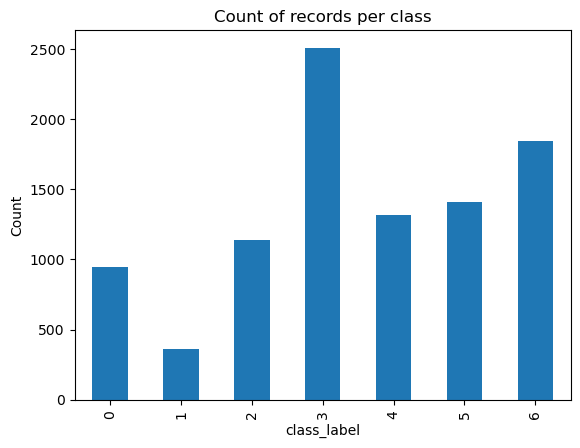

In [24]:
df_train_scaled.groupby('class_label')['class_label'].count().plot(kind='bar', ylabel='Count', title='Count of records per class')

## **4.3. Oversampling**

Oversample the minority classes in the dataset to create a balanced dataset using SMOTE(Synthetic Minority Oversampling Technique)

In [25]:
smote_oversampler = SMOTE(sampling_strategy={0: 2400, 1: 2400, 2: 2400, 4: 2400, 5: 2400, 6: 2400})

In [26]:
X_train_scaled_oversampled, y_train_oversampled = smote_oversampler.fit_resample(X_train, y_train)

In [27]:
df_train_scaled_oversampled = pd.DataFrame(X_train_scaled_oversampled, columns=df_dry_beans.drop('Class', axis=1).columns.tolist())
df_train_scaled_oversampled['class_label'] = y_train_oversampled.tolist()
df_train_scaled_oversampled['class_label'].unique()

array([3, 6, 5, 4, 2, 0, 1], dtype=int64)

<Axes: title={'center': 'Count of records per class'}, xlabel='class_label', ylabel='Count'>

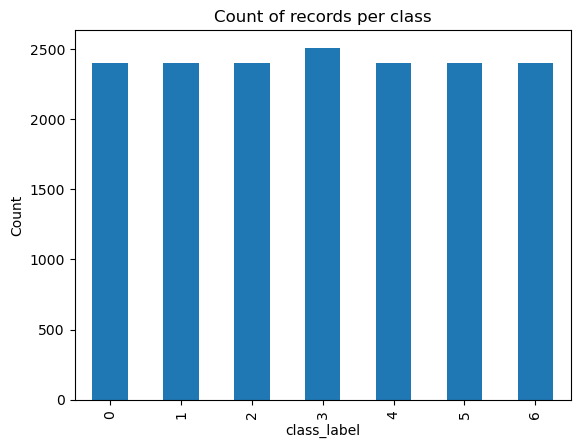

In [28]:
df_train_scaled_oversampled.groupby('class_label')['class_label'].count().plot(kind='bar', ylabel='Count', title='Count of records per class')

## **4.4. Principal Component Analysis (PCA)**

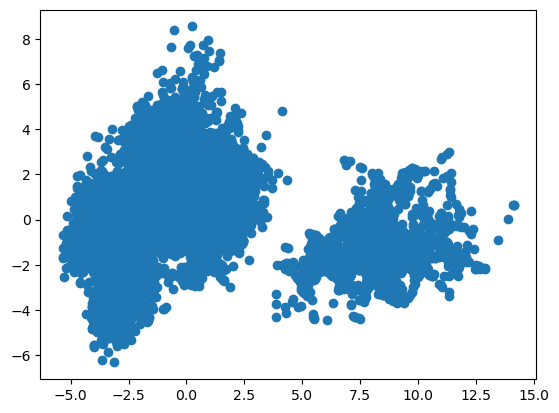

In [29]:
#Checking to see if dataset is linearly separable or not
pca = PCA(n_components=2)
X_2PCA_plot = pca.fit_transform(X_train_scaled_oversampled)
plt.scatter(X_2PCA_plot[:,0], X_2PCA_plot[:,1])
plt.show()

The dataset does not seem to be linearly separable into 7 different classes when reduced down to 2 dimensions. Hence, it is better to go with Random Forest or Support Vector Machine ML models for classification.

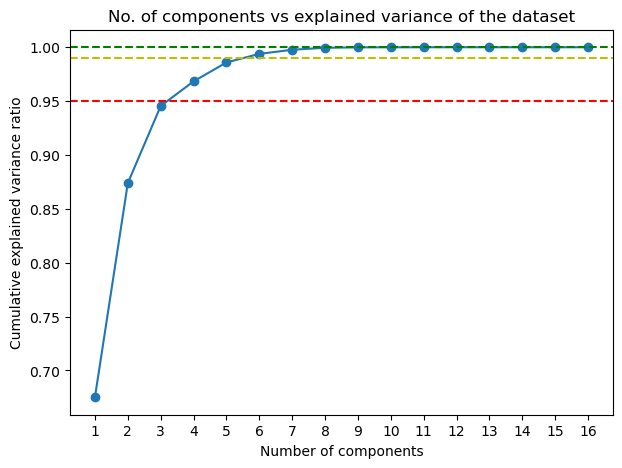

In [30]:
# Perform PCA to reduce the dimensionality of the dataset
pca = PCA()
pca.fit(X_train_scaled_oversampled)

# Calculate the cumulative explained variance ratio
exp_variance_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(exp_variance_cumsum)+1), exp_variance_cumsum, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axhline(y=0.99, color='y', linestyle='--')
plt.axhline(y=1, color='g', linestyle='--')
plt.xticks(range(1, len(exp_variance_cumsum)+1))
plt.title('No. of components vs explained variance of the dataset')
plt.show()

The above graph shows the variance in the dataset that can be captured by reducing the dimensionality of the dataset using PCA for a given number of components. 
There are 3 horizontal lines drawn in the graph, each showing 95%, 99% and 100% variance respectively.

With number of components = 4, we can capture 95% of the variance. Similiarly, with number of components = 6, we can capture 99% of the dataset and 100% of the variance with 9 or above number of components.

We will perform PCA with number of components set to 6. This is so that we do not want our models to overfit to the test data and have sufficient bias to accurately predict unseen data.

In [31]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train_scaled_oversampled)
X_test = pca.transform(X_test)
#X_validation = pca.transform(X_validation)

In [32]:
X_train.shape

(16910, 6)

# **5. Model training and evaluation**

## **5.1. Random Forest Classifier**

In [33]:
# Define the hyperparameter grid to search for best set of hyperparameters
hyperparam_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20]
}

rfc = RandomForestClassifier(random_state=seed)

# Create the grid search object
#cv = corss-validation splits. Here we will use 10.
grid_search_obj = GridSearchCV(rfc, hyperparam_grid, cv=10)

grid_search_obj.fit(X_train, y_train_oversampled)

# Print the best parameters and score
print('Best hyperparameters:', grid_search_obj.best_params_)
print('Best score:', grid_search_obj.best_score_)

Best hyperparameters: {'max_depth': 20, 'n_estimators': 200}
Best score: 0.958013010053223


In [34]:
rf = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=seed)
rf.fit(X_train, y_train_oversampled)
y_pred = rf.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score_ = f1_score(y_test, y_pred, average='macro')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-Score: ', f1_score_)

Accuracy:  0.9233594515181195
Precision:  0.9347060285411514
Recall:  0.9334479149420302
F1-Score:  0.9340396258778041


[Text(0, 0, 'BARBUNYA'),
 Text(1, 0, 'BOMBAY'),
 Text(2, 0, 'CALI'),
 Text(3, 0, 'DERMASON'),
 Text(4, 0, 'HOROZ'),
 Text(5, 0, 'SEKER'),
 Text(6, 0, 'SIRA')]

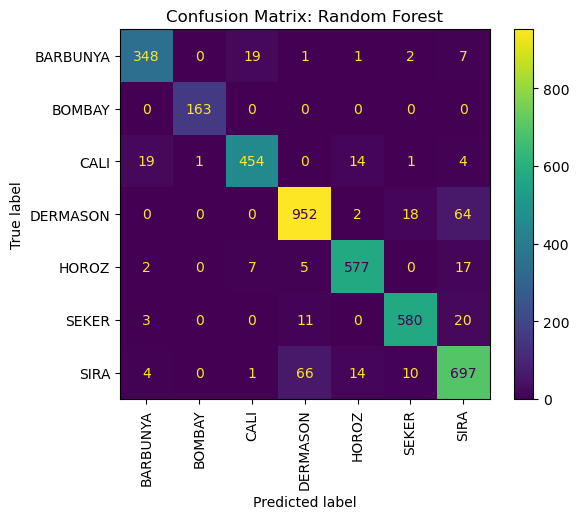

In [36]:
conf_mat = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(conf_mat)
cm_plot.plot()
cm_plot.ax_.set_title('Confusion Matrix: Random Forest')
cm_plot.ax_.set_yticklabels(map(lambda y: reverse_label_value_mapping[y], reverse_label_value_mapping.keys()))
cm_plot.ax_.set_xticklabels(map(lambda y: reverse_label_value_mapping[y], reverse_label_value_mapping.keys()), rotation=90)

## **5.2. Support Vector Machines (SVM) Classifier**

In [56]:
hyperparam_grid = {
    'C' : [0.1, 0.5, 1.0, 5.0, 10.0, 15.0],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree' : [3, 4, 5]
}

svm_classifier = SVC(random_state=seed)

grid_search_obj_svm = GridSearchCV(svm_classifier, hyperparam_grid, cv=10)
grid_search_obj_svm.fit(X_train, y_train_oversampled)

# Print the best parameters and score
print('Best hyperparameters:', grid_search_obj_svm.best_params_)
print('Best score:', grid_search_obj_svm.best_score_)

Best hyperparameters: {'C': 15.0, 'degree': 3, 'kernel': 'rbf'}
Best score: 0.9496156120638675


In [57]:
svm_classifier = SVC(C=15.0, degree=3, kernel='rbf',random_state=seed, gamma='scale', class_weight=None)
svm_classifier.fit(X_train, y_train_oversampled)
y_pred = svm_classifier.predict(X_test)
best_pred = y_pred

In [58]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score_ = f1_score(y_test, y_pred, average='macro')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-Score: ', f1_score_)

Accuracy:  0.9262977473065622
Precision:  0.9386763408682297
Recall:  0.9378224702141548
F1-Score:  0.9381095661311508


[Text(0, 0, 'BARBUNYA'),
 Text(1, 0, 'BOMBAY'),
 Text(2, 0, 'CALI'),
 Text(3, 0, 'DERMASON'),
 Text(4, 0, 'HOROZ'),
 Text(5, 0, 'SEKER'),
 Text(6, 0, 'SIRA')]

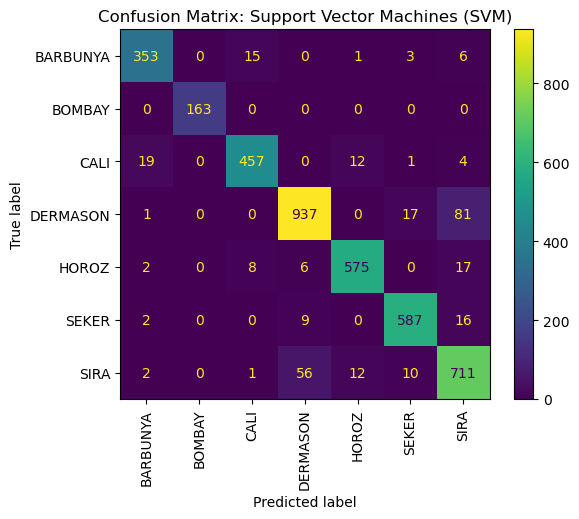

In [59]:
conf_mat = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(conf_mat)
cm_plot.plot()
cm_plot.ax_.set_title('Confusion Matrix: Support Vector Machines (SVM)')
cm_plot.ax_.set_yticklabels(map(lambda y: reverse_label_value_mapping[y], reverse_label_value_mapping.keys()))
cm_plot.ax_.set_xticklabels(map(lambda y: reverse_label_value_mapping[y], reverse_label_value_mapping.keys()), rotation=90)

## **5.3 Multi-Layer Perceptron / Multi-Layer Neural Network**

### **The following section uses code that has been adapted from Machine Learning Lab Solutions for Lab 5 and Lab 6 (University of Sussex 2023)**

In [41]:
# Code adapted from MachineLearning Lab 5 and Lab 6 solutions (University of Sussex 2023)
class DryBeanMultiClass_NN_Classifier(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_sizes: list,
                 output_size: int,
                 dropout:float = 0.2,
                 relu:float = 0.1):
        super().__init__()
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], output_size)
        self.dropout = nn.Dropout(dropout)
        self.leakyrelu = nn.LeakyReLU(0.1)
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = self.hidden_l1(inputs)
        x = self.dropout(x)
        x = self.hidden_l2(x)
        x = self.leakyrelu(x)
        x = self.output_l3(x)
        return x

In [42]:
# A class for managing the data for training the model
# Code adapted from MachineLearning Lab 5 and Lab 6 solutions (University of Sussex 2023)
class DryBeanDataset(Dataset):
    def __init__(self, feats, labels):
        # Convert your features and labels from numpy arrays to PyTorch tensors
        self.feats = torch.tensor(feats, dtype=torch.float32)
        # I subtract 1 to change the range of the labels from 1 - 7 to 0 - 6
        # This will be necessary for the loss function computation
        self.labels = torch.tensor(labels.tolist(), dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):     
        return self.feats[idx, :], self.labels[idx]

In [43]:
#Splitting into train and validation sets 
X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp = train_test_split(X_train, y_train_oversampled, test_size=0.2, train_size=0.8, random_state=seed, shuffle=True)

In [44]:
train_set = DryBeanDataset(X_train_mlp, y_train_mlp)
validation_set = DryBeanDataset(X_val_mlp, y_val_mlp)
test_set = DryBeanDataset(X_test, y_test)

BATCH_SIZE = 40
train_dataloader = DataLoader(train_set, batch_size=BATCH_SIZE)
validation_dataloader = DataLoader(validation_set, batch_size=len(validation_set))
test_dataloader = DataLoader(test_set, batch_size=len(test_set))

In [45]:
feature_count = X_train_mlp.shape[1]
hidden_layer_sizes = [100, 100]
class_count = len(reverse_label_value_mapping.keys())
dry_bean_MLP_model = DryBeanMultiClass_NN_Classifier(feature_count, hidden_layer_sizes, class_count)

In [46]:
# Set parameter values
num_epochs = 50
learning_rate = 0.0008
batch_size = 80

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')


 Batch size= 80

 Learning rate= 0.0008

 Number of epochs= 50

 Model=3-layer MLP


In [47]:
# Code adapted from MachineLearning Lab 5 and Lab 6 solutions (University of Sussex 2023)
# You can create a method for computing performance metrics of interest
def my_metrics(labels, predictions):
    ## First work out which class has been predicted for each data sample. Hint: use argmax
    ## Second count how many of these are correctly predicted
    ## Finally return the accuracy, i.e. the percentage of samples correctly predicted

    predictions_numpy = predictions.detach().numpy()
    predicted_classes = np.argmax(predictions_numpy, axis=1)
    avg_f1_score = f1_score(labels, predicted_classes, average='macro')
    acc = accuracy_score(labels, predicted_classes)
    return avg_f1_score, acc

In [48]:
# Code adapted from MachineLearning Lab 5 and Lab 6 solutions (University of Sussex 2023)
def train_model(model, learning_rate, epochs, train_dataloader, val_dataloader):
   #The optimizer we'll use to update the model parameters
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  # Compute the loss against the training labels using the nn.CrossEntropyLoss class 
  loss_function = nn.CrossEntropyLoss()

  # Set the model to training mode
  model.train()

  best_model_acc = 0
  losses = []

  #Each epoch is executed.
  for epoch in range(0, num_epochs):
      if epoch == 0:  best_model = deepcopy(model)
      for batch, (X_train, y_train) in enumerate(train_dataloader):
        # Then the value of loss function 
        train_pred = model.forward(X_train)
        train_loss = loss_function(train_pred, y_train)
        train_avg_f1_score, train_acc = my_metrics(y_train, train_pred)
        #Zeroing out the gradient buffers.
        optimizer.zero_grad()

        # Compute the model parameters' gradients 
        # and propagate the loss backwards through the network.
        train_loss.backward()

        # Now we update the model parameters using those gradients
        optimizer.step()

      for batch, (X_val, y_val) in enumerate(val_dataloader):
        val_pred = model.forward(X_val)
        val_loss = loss_function(val_pred, y_val)
        val_avg_f1_score, val_acc = my_metrics(y_val, val_pred)

      if val_acc > best_model_acc:
        best_model_acc = val_acc
        best_model = deepcopy(model)
        print('Found improvement in performance. New model saved.')

      # How well the network does on the batch is an indication of how well training is 
      # progressing
      print("epoch: {} - train loss: {:5.5f} train acc: {:2.2f} val loss: {:5.5f} val acc: {:2.2f}".format(
          epoch,
          train_loss.item(),
          train_acc,
          val_loss.item(),
          val_acc

      ))
      losses.append([train_loss.item(), val_loss.item()])
      
  model = best_model

  return model, losses, best_model_acc

In [62]:
# Code adapted from MachineLearning Lab 5 and Lab 6 solutions (University of Sussex 2023)
def evaluate_model(model, losses, test_dataloader):

  # Finally we can test our model on the test set and get an estimate of its performance. 
  # First set the model to evaluation mode 
  model.eval()  
  for batch, (X_test, y_test) in enumerate(test_dataloader):
    test_pred = model.forward(X_test)    
    test_avg_f1_score, test_accuracy = my_metrics(y_test, test_pred)
    print("\n test f1 score: {} | test accuracy: {}".format(test_avg_f1_score, test_accuracy))
    test_pred_numpy = test_pred.detach().numpy()
    test_f1_scores = f1_score(y_test, np.argmax(test_pred_numpy, axis=1), average=None)
    print('\n The F1 scores for each of the classes are: '+str(test_f1_scores))

    print("\n Confusion matrix:")
    confusion_mat = confusion_matrix(y_test, np.argmax(test_pred_numpy, axis=1))
    disp = ConfusionMatrixDisplay(confusion_mat)
    disp.plot()
    disp.ax_.set_title('Confusion Matrix: Three Layer MLP')
    disp.ax_.set_yticklabels(map(lambda y: reverse_label_value_mapping[y], reverse_label_value_mapping.keys()))
    disp.ax_.set_xticklabels(map(lambda y: reverse_label_value_mapping[y], reverse_label_value_mapping.keys()), rotation=90)
    plt.show()

    print("\n Loss:")
    fig, ax = plt.subplots()
    losses = np.array(losses)
    ax.plot(losses[:, 0], 'k-', label='training loss') 
    ax.plot(losses[:, 1], 'b-', label='validation loss') 
    plt.legend(loc='upper right')

In [50]:
# Set parameter values
list_epochs = [10, 20, 50]
list_learning_rate = [0.0001, 0.0008, 0.01, 0.00001]
list_batch_size = [10, 30, 50, 80]
best_validation_accuracy = 0

#Initialising the best params dict with the first values in each list
#This does not reflect the actual best parameters for the model
best_params = {'epoch': 10, 'learning_rate':0.0001, 'batch_size':10 }

for epoch in list_epochs:
    for LR in list_learning_rate:
        for batch_size in list_batch_size:
            train_dataloader_iter = DataLoader(train_set, batch_size=batch_size)
            print("________________________________________________________________________________________________________")
            print("Parameters for current run:")
            print(f"Epochs: {epoch}\tLearning Rate: {LR}\tBatch Size: {batch_size}")
            dry_bean_MLP_model_iter = DryBeanMultiClass_NN_Classifier(feature_count, hidden_layer_sizes, class_count)
            _, __, validation_accuracy = train_model(dry_bean_MLP_model_iter, LR, epoch, train_dataloader_iter, validation_dataloader)
            if validation_accuracy > best_validation_accuracy:
                best_validation_accuracy = validation_accuracy
                best_params['epoch'] = epoch
                best_params['learning_rate'] = LR
                best_params['batch_size'] = batch_size

print("________________________________________________________________________________________________________")              
print('Best Parameters:')
print(best_params)

________________________________________________________________________________________________________
Parameters for current run:
Epochs: 10	Learning Rate: 0.0001	Batch Size: 10
Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.60680 train acc: 0.50 val loss: 1.60010 val acc: 0.44
Found improvement in performance. New model saved.
epoch: 1 - train loss: 1.45278 train acc: 0.62 val loss: 1.43231 val acc: 0.48
Found improvement in performance. New model saved.
epoch: 2 - train loss: 1.22094 train acc: 0.50 val loss: 1.31480 val acc: 0.53
Found improvement in performance. New model saved.
epoch: 3 - train loss: 1.20128 train acc: 0.50 val loss: 1.22435 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 4 - train loss: 1.07246 train acc: 0.75 val loss: 1.14369 val acc: 0.61
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.96340 train acc: 0.75 val loss: 1.08255 val acc: 0.64
Found improvement in performance. New m

Found improvement in performance. New model saved.
epoch: 15 - train loss: 0.90671 train acc: 0.75 val loss: 1.09462 val acc: 0.62
Found improvement in performance. New model saved.
epoch: 16 - train loss: 0.88134 train acc: 0.79 val loss: 1.07116 val acc: 0.63
Found improvement in performance. New model saved.
epoch: 17 - train loss: 0.86639 train acc: 0.79 val loss: 1.04980 val acc: 0.64
Found improvement in performance. New model saved.
epoch: 18 - train loss: 0.80715 train acc: 0.82 val loss: 1.02711 val acc: 0.65
Found improvement in performance. New model saved.
epoch: 19 - train loss: 0.80381 train acc: 0.75 val loss: 1.01099 val acc: 0.66
Found improvement in performance. New model saved.
epoch: 20 - train loss: 0.81161 train acc: 0.79 val loss: 0.99251 val acc: 0.66
Found improvement in performance. New model saved.
epoch: 21 - train loss: 0.77243 train acc: 0.79 val loss: 0.97326 val acc: 0.67
Found improvement in performance. New model saved.
epoch: 22 - train loss: 0.76951 

epoch: 28 - train loss: 0.99196 train acc: 0.68 val loss: 1.10573 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 29 - train loss: 0.98403 train acc: 0.68 val loss: 1.09186 val acc: 0.60
Found improvement in performance. New model saved.
epoch: 30 - train loss: 0.98383 train acc: 0.71 val loss: 1.07977 val acc: 0.61
Found improvement in performance. New model saved.
epoch: 31 - train loss: 0.96870 train acc: 0.64 val loss: 1.06832 val acc: 0.62
Found improvement in performance. New model saved.
epoch: 32 - train loss: 0.92096 train acc: 0.68 val loss: 1.05817 val acc: 0.62
Found improvement in performance. New model saved.
epoch: 33 - train loss: 0.94531 train acc: 0.68 val loss: 1.04560 val acc: 0.63
epoch: 34 - train loss: 0.89984 train acc: 0.71 val loss: 1.03857 val acc: 0.62
Found improvement in performance. New model saved.
epoch: 35 - train loss: 0.91361 train acc: 0.75 val loss: 1.02744 val acc: 0.63
Found improvement in performance. New model saved.
epo

Found improvement in performance. New model saved.
epoch: 48 - train loss: 1.01075 train acc: 0.75 val loss: 1.08994 val acc: 0.60
Found improvement in performance. New model saved.
epoch: 49 - train loss: 0.99784 train acc: 0.75 val loss: 1.07994 val acc: 0.61
________________________________________________________________________________________________________
Parameters for current run:
Epochs: 10	Learning Rate: 0.0008	Batch Size: 10
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.75314 train acc: 0.88 val loss: 0.91557 val acc: 0.69
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.47871 train acc: 0.88 val loss: 0.65508 val acc: 0.79
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.35480 train acc: 1.00 val loss: 0.51719 val acc: 0.84
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.26542 train acc: 1.00 val loss: 0.44287 val acc: 0.86
Found improvement in performance. New

Found improvement in performance. New model saved.
epoch: 22 - train loss: 0.30448 train acc: 0.86 val loss: 0.30194 val acc: 0.91
epoch: 23 - train loss: 0.28721 train acc: 0.93 val loss: 0.29591 val acc: 0.91
epoch: 24 - train loss: 0.22516 train acc: 0.93 val loss: 0.29536 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 25 - train loss: 0.23507 train acc: 0.93 val loss: 0.28243 val acc: 0.91
epoch: 26 - train loss: 0.21635 train acc: 0.96 val loss: 0.28792 val acc: 0.91
epoch: 27 - train loss: 0.29762 train acc: 0.93 val loss: 0.27637 val acc: 0.91
epoch: 28 - train loss: 0.26619 train acc: 0.93 val loss: 0.27459 val acc: 0.91
epoch: 29 - train loss: 0.29102 train acc: 0.89 val loss: 0.27056 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 30 - train loss: 0.25538 train acc: 0.93 val loss: 0.26392 val acc: 0.92
epoch: 31 - train loss: 0.25799 train acc: 0.89 val loss: 0.26300 val acc: 0.92
epoch: 32 - train loss: 0.24208 train acc: 0.93

epoch: 46 - train loss: 0.28989 train acc: 0.93 val loss: 0.29097 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 47 - train loss: 0.31164 train acc: 0.89 val loss: 0.28326 val acc: 0.91
epoch: 48 - train loss: 0.32192 train acc: 0.89 val loss: 0.28823 val acc: 0.90
epoch: 49 - train loss: 0.24653 train acc: 0.89 val loss: 0.28525 val acc: 0.90
________________________________________________________________________________________________________
Parameters for current run:
Epochs: 10	Learning Rate: 0.0008	Batch Size: 80
Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.58060 train acc: 0.62 val loss: 1.65318 val acc: 0.48
Found improvement in performance. New model saved.
epoch: 1 - train loss: 1.32560 train acc: 0.75 val loss: 1.44251 val acc: 0.53
Found improvement in performance. New model saved.
epoch: 2 - train loss: 1.21558 train acc: 0.62 val loss: 1.30775 val acc: 0.54
Found improvement in performance. New model saved.
epoch: 

epoch: 18 - train loss: 0.04177 train acc: 1.00 val loss: 0.18378 val acc: 0.93
epoch: 19 - train loss: 0.02619 train acc: 1.00 val loss: 0.18911 val acc: 0.94
Found improvement in performance. New model saved.
epoch: 20 - train loss: 0.03765 train acc: 1.00 val loss: 0.18405 val acc: 0.94
Found improvement in performance. New model saved.
epoch: 21 - train loss: 0.02700 train acc: 1.00 val loss: 0.17654 val acc: 0.94
epoch: 22 - train loss: 0.08936 train acc: 1.00 val loss: 0.17804 val acc: 0.94
epoch: 23 - train loss: 0.02333 train acc: 1.00 val loss: 0.18370 val acc: 0.94
epoch: 24 - train loss: 0.02095 train acc: 1.00 val loss: 0.18188 val acc: 0.94
epoch: 25 - train loss: 0.01399 train acc: 1.00 val loss: 0.18049 val acc: 0.94
epoch: 26 - train loss: 0.02115 train acc: 1.00 val loss: 0.17470 val acc: 0.94
epoch: 27 - train loss: 0.02698 train acc: 1.00 val loss: 0.17729 val acc: 0.94
epoch: 28 - train loss: 0.03487 train acc: 1.00 val loss: 0.17893 val acc: 0.94
Found improvement 

Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.31611 train acc: 0.86 val loss: 0.33880 val acc: 0.89
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.29106 train acc: 0.89 val loss: 0.29192 val acc: 0.91
epoch: 4 - train loss: 0.25316 train acc: 0.89 val loss: 0.26826 val acc: 0.91
epoch: 5 - train loss: 0.27775 train acc: 0.89 val loss: 0.25771 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.23320 train acc: 0.89 val loss: 0.24280 val acc: 0.92
Found improvement in performance. New model saved.
epoch: 7 - train loss: 0.28770 train acc: 0.89 val loss: 0.23148 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 8 - train loss: 0.26113 train acc: 0.93 val loss: 0.23119 val acc: 0.93
epoch: 9 - train loss: 0.28737 train acc: 0.93 val loss: 0.22087 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 10 - train loss: 0.22779 train acc: 0.96 val loss: 0.22

epoch: 36 - train loss: 0.03130 train acc: 1.00 val loss: 0.19834 val acc: 0.93
epoch: 37 - train loss: 0.03018 train acc: 1.00 val loss: 0.19906 val acc: 0.93
epoch: 38 - train loss: 0.03221 train acc: 1.00 val loss: 0.18850 val acc: 0.93
epoch: 39 - train loss: 0.03131 train acc: 1.00 val loss: 0.19918 val acc: 0.93
epoch: 40 - train loss: 0.06788 train acc: 1.00 val loss: 0.20227 val acc: 0.93
epoch: 41 - train loss: 0.05569 train acc: 1.00 val loss: 0.19854 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 42 - train loss: 0.02864 train acc: 1.00 val loss: 0.19183 val acc: 0.94
epoch: 43 - train loss: 0.02897 train acc: 1.00 val loss: 0.19883 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 44 - train loss: 0.02647 train acc: 1.00 val loss: 0.19130 val acc: 0.94
epoch: 45 - train loss: 0.03300 train acc: 1.00 val loss: 0.19332 val acc: 0.93
epoch: 46 - train loss: 0.03400 train acc: 1.00 val loss: 0.19139 val acc: 0.94
epoch: 47 - train 

Found improvement in performance. New model saved.
epoch: 6 - train loss: 1.87437 train acc: 0.21 val loss: 1.92220 val acc: 0.15
Found improvement in performance. New model saved.
epoch: 7 - train loss: 1.87044 train acc: 0.25 val loss: 1.91159 val acc: 0.16
Found improvement in performance. New model saved.
epoch: 8 - train loss: 1.89980 train acc: 0.25 val loss: 1.89551 val acc: 0.17
Found improvement in performance. New model saved.
epoch: 9 - train loss: 1.83019 train acc: 0.21 val loss: 1.87823 val acc: 0.19
Found improvement in performance. New model saved.
epoch: 10 - train loss: 1.80662 train acc: 0.25 val loss: 1.86848 val acc: 0.19
Found improvement in performance. New model saved.
epoch: 11 - train loss: 1.81317 train acc: 0.29 val loss: 1.85176 val acc: 0.21
Found improvement in performance. New model saved.
epoch: 12 - train loss: 1.81712 train acc: 0.25 val loss: 1.84176 val acc: 0.23
Found improvement in performance. New model saved.
epoch: 13 - train loss: 1.77887 trai

Found improvement in performance. New model saved.
epoch: 24 - train loss: 1.71414 train acc: 0.39 val loss: 1.78461 val acc: 0.36
epoch: 25 - train loss: 1.70111 train acc: 0.43 val loss: 1.77833 val acc: 0.36
Found improvement in performance. New model saved.
epoch: 26 - train loss: 1.70780 train acc: 0.39 val loss: 1.77510 val acc: 0.37
Found improvement in performance. New model saved.
epoch: 27 - train loss: 1.70963 train acc: 0.46 val loss: 1.76422 val acc: 0.38
Found improvement in performance. New model saved.
epoch: 28 - train loss: 1.65953 train acc: 0.50 val loss: 1.75819 val acc: 0.39
Found improvement in performance. New model saved.
epoch: 29 - train loss: 1.66822 train acc: 0.61 val loss: 1.75248 val acc: 0.39
Found improvement in performance. New model saved.
epoch: 30 - train loss: 1.66527 train acc: 0.57 val loss: 1.74022 val acc: 0.40
Found improvement in performance. New model saved.
epoch: 31 - train loss: 1.67455 train acc: 0.43 val loss: 1.73868 val acc: 0.41
Fou

Found improvement in performance. New model saved.
epoch: 45 - train loss: 1.75009 train acc: 0.50 val loss: 1.73028 val acc: 0.38
epoch: 46 - train loss: 1.75542 train acc: 0.25 val loss: 1.72634 val acc: 0.37
Found improvement in performance. New model saved.
epoch: 47 - train loss: 1.77783 train acc: 0.25 val loss: 1.72309 val acc: 0.38
Found improvement in performance. New model saved.
epoch: 48 - train loss: 1.71129 train acc: 0.38 val loss: 1.72225 val acc: 0.39
epoch: 49 - train loss: 1.75206 train acc: 0.38 val loss: 1.71718 val acc: 0.39
________________________________________________________________________________________________________
Parameters for current run:
Epochs: 20	Learning Rate: 0.0001	Batch Size: 10
Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.67672 train acc: 0.38 val loss: 1.58239 val acc: 0.46
Found improvement in performance. New model saved.
epoch: 1 - train loss: 1.36292 train acc: 0.50 val loss: 1.41551 val acc: 0.47
Found 

Found improvement in performance. New model saved.
epoch: 9 - train loss: 1.17889 train acc: 0.71 val loss: 1.30984 val acc: 0.57
Found improvement in performance. New model saved.
epoch: 10 - train loss: 1.13359 train acc: 0.75 val loss: 1.27576 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 11 - train loss: 1.09087 train acc: 0.75 val loss: 1.24305 val acc: 0.60
Found improvement in performance. New model saved.
epoch: 12 - train loss: 1.06773 train acc: 0.75 val loss: 1.21390 val acc: 0.61
epoch: 13 - train loss: 1.03353 train acc: 0.75 val loss: 1.19033 val acc: 0.61
Found improvement in performance. New model saved.
epoch: 14 - train loss: 1.00890 train acc: 0.75 val loss: 1.15608 val acc: 0.62
Found improvement in performance. New model saved.
epoch: 15 - train loss: 0.97808 train acc: 0.75 val loss: 1.13489 val acc: 0.64
Found improvement in performance. New model saved.
epoch: 16 - train loss: 0.94551 train acc: 0.75 val loss: 1.11012 val acc: 0.64
Foun

Found improvement in performance. New model saved.
epoch: 25 - train loss: 1.00909 train acc: 0.71 val loss: 1.14826 val acc: 0.61
Found improvement in performance. New model saved.
epoch: 26 - train loss: 0.94797 train acc: 0.75 val loss: 1.13417 val acc: 0.61
Found improvement in performance. New model saved.
epoch: 27 - train loss: 0.95048 train acc: 0.75 val loss: 1.11772 val acc: 0.61
epoch: 28 - train loss: 0.91796 train acc: 0.79 val loss: 1.10755 val acc: 0.61
epoch: 29 - train loss: 0.91095 train acc: 0.79 val loss: 1.09596 val acc: 0.61
Found improvement in performance. New model saved.
epoch: 30 - train loss: 0.88224 train acc: 0.79 val loss: 1.08244 val acc: 0.62
Found improvement in performance. New model saved.
epoch: 31 - train loss: 0.89888 train acc: 0.71 val loss: 1.06785 val acc: 0.63
Found improvement in performance. New model saved.
epoch: 32 - train loss: 0.86857 train acc: 0.75 val loss: 1.05718 val acc: 0.63
epoch: 33 - train loss: 0.88502 train acc: 0.75 val lo

Found improvement in performance. New model saved.
epoch: 41 - train loss: 1.01941 train acc: 0.75 val loss: 1.18312 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 42 - train loss: 1.06863 train acc: 0.75 val loss: 1.17454 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 43 - train loss: 1.02682 train acc: 0.62 val loss: 1.16600 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 44 - train loss: 0.95398 train acc: 0.75 val loss: 1.15856 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 45 - train loss: 0.96448 train acc: 0.75 val loss: 1.14854 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 46 - train loss: 0.99521 train acc: 0.75 val loss: 1.14161 val acc: 0.59
epoch: 47 - train loss: 0.96294 train acc: 0.75 val loss: 1.13262 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 48 - train loss: 0.98487 train acc: 0.75 val loss: 1.12643 val acc: 0.60
Fou

Found improvement in performance. New model saved.
epoch: 12 - train loss: 0.34133 train acc: 0.93 val loss: 0.39458 val acc: 0.89
epoch: 13 - train loss: 0.30675 train acc: 0.96 val loss: 0.38272 val acc: 0.89
Found improvement in performance. New model saved.
epoch: 14 - train loss: 0.34283 train acc: 0.93 val loss: 0.36785 val acc: 0.90
Found improvement in performance. New model saved.
epoch: 15 - train loss: 0.30749 train acc: 0.93 val loss: 0.35110 val acc: 0.90
Found improvement in performance. New model saved.
epoch: 16 - train loss: 0.29648 train acc: 0.93 val loss: 0.34317 val acc: 0.91
epoch: 17 - train loss: 0.32628 train acc: 0.93 val loss: 0.32854 val acc: 0.90
Found improvement in performance. New model saved.
epoch: 18 - train loss: 0.32565 train acc: 0.93 val loss: 0.32213 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 19 - train loss: 0.29456 train acc: 0.93 val loss: 0.31210 val acc: 0.91
Found improvement in performance. New model saved.
epo

epoch: 37 - train loss: 0.27288 train acc: 0.93 val loss: 0.30948 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 38 - train loss: 0.27104 train acc: 0.93 val loss: 0.30378 val acc: 0.92
epoch: 39 - train loss: 0.29458 train acc: 0.89 val loss: 0.30094 val acc: 0.91
epoch: 40 - train loss: 0.28119 train acc: 0.89 val loss: 0.30214 val acc: 0.91
epoch: 41 - train loss: 0.30745 train acc: 0.93 val loss: 0.29262 val acc: 0.91
epoch: 42 - train loss: 0.27967 train acc: 0.89 val loss: 0.29315 val acc: 0.91
epoch: 43 - train loss: 0.29736 train acc: 0.93 val loss: 0.28976 val acc: 0.91
epoch: 44 - train loss: 0.31623 train acc: 0.89 val loss: 0.29018 val acc: 0.91
epoch: 45 - train loss: 0.28371 train acc: 0.89 val loss: 0.28690 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 46 - train loss: 0.35049 train acc: 0.93 val loss: 0.28420 val acc: 0.92
epoch: 47 - train loss: 0.26860 train acc: 0.89 val loss: 0.27813 val acc: 0.91
epoch: 48 - train 

epoch: 5 - train loss: 0.03930 train acc: 1.00 val loss: 0.21026 val acc: 0.93
epoch: 6 - train loss: 0.02137 train acc: 1.00 val loss: 0.19855 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 7 - train loss: 0.02306 train acc: 1.00 val loss: 0.19901 val acc: 0.93
epoch: 8 - train loss: 0.02876 train acc: 1.00 val loss: 0.20342 val acc: 0.93
epoch: 9 - train loss: 0.02990 train acc: 1.00 val loss: 0.19660 val acc: 0.93
epoch: 10 - train loss: 0.02300 train acc: 1.00 val loss: 0.19097 val acc: 0.93
epoch: 11 - train loss: 0.02231 train acc: 1.00 val loss: 0.19754 val acc: 0.93
epoch: 12 - train loss: 0.02544 train acc: 1.00 val loss: 0.19154 val acc: 0.93
epoch: 13 - train loss: 0.02907 train acc: 1.00 val loss: 0.18890 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 14 - train loss: 0.02762 train acc: 1.00 val loss: 0.18648 val acc: 0.93
epoch: 15 - train loss: 0.02180 train acc: 1.00 val loss: 0.18509 val acc: 0.93
Found improvement in pe

epoch: 41 - train loss: 0.17669 train acc: 0.93 val loss: 0.17622 val acc: 0.94
epoch: 42 - train loss: 0.16049 train acc: 0.93 val loss: 0.17955 val acc: 0.94
epoch: 43 - train loss: 0.17426 train acc: 0.93 val loss: 0.17720 val acc: 0.94
epoch: 44 - train loss: 0.13974 train acc: 0.96 val loss: 0.17892 val acc: 0.94
epoch: 45 - train loss: 0.15739 train acc: 0.96 val loss: 0.17833 val acc: 0.94
epoch: 46 - train loss: 0.19219 train acc: 0.93 val loss: 0.17684 val acc: 0.94
epoch: 47 - train loss: 0.16200 train acc: 0.96 val loss: 0.17894 val acc: 0.94
epoch: 48 - train loss: 0.16746 train acc: 0.93 val loss: 0.17629 val acc: 0.94
epoch: 49 - train loss: 0.22853 train acc: 0.93 val loss: 0.17879 val acc: 0.94
________________________________________________________________________________________________________
Parameters for current run:
Epochs: 20	Learning Rate: 0.01	Batch Size: 50
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.55604 train acc: 0.89 val

epoch: 21 - train loss: 0.04547 train acc: 1.00 val loss: 0.21413 val acc: 0.93
epoch: 22 - train loss: 0.01896 train acc: 1.00 val loss: 0.21187 val acc: 0.93
epoch: 23 - train loss: 0.04700 train acc: 1.00 val loss: 0.21376 val acc: 0.93
epoch: 24 - train loss: 0.05836 train acc: 1.00 val loss: 0.20745 val acc: 0.93
epoch: 25 - train loss: 0.02826 train acc: 1.00 val loss: 0.20948 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 26 - train loss: 0.04509 train acc: 1.00 val loss: 0.20553 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 27 - train loss: 0.02886 train acc: 1.00 val loss: 0.20291 val acc: 0.93
epoch: 28 - train loss: 0.03487 train acc: 1.00 val loss: 0.20516 val acc: 0.93
epoch: 29 - train loss: 0.03470 train acc: 1.00 val loss: 0.20493 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 30 - train loss: 0.06526 train acc: 1.00 val loss: 0.20412 val acc: 0.93
epoch: 31 - train loss: 0.05439 train acc: 1.00

epoch: 44 - train loss: 1.02597 train acc: 0.75 val loss: 1.20402 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 45 - train loss: 1.03510 train acc: 0.75 val loss: 1.19771 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 46 - train loss: 1.00986 train acc: 0.75 val loss: 1.19032 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 47 - train loss: 1.04736 train acc: 0.62 val loss: 1.18270 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 48 - train loss: 1.04344 train acc: 0.75 val loss: 1.17450 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 49 - train loss: 1.00548 train acc: 0.75 val loss: 1.16478 val acc: 0.59
________________________________________________________________________________________________________
Parameters for current run:
Epochs: 20	Learning Rate: 1e-05	Batch Size: 30
Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.94626 tra

Found improvement in performance. New model saved.
epoch: 11 - train loss: 1.94797 train acc: 0.14 val loss: 1.92783 val acc: 0.24
Found improvement in performance. New model saved.
epoch: 12 - train loss: 1.94349 train acc: 0.21 val loss: 1.92572 val acc: 0.24
epoch: 13 - train loss: 1.88210 train acc: 0.29 val loss: 1.91917 val acc: 0.23
Found improvement in performance. New model saved.
epoch: 14 - train loss: 1.89751 train acc: 0.18 val loss: 1.90676 val acc: 0.25
epoch: 15 - train loss: 1.89718 train acc: 0.25 val loss: 1.89819 val acc: 0.25
Found improvement in performance. New model saved.
epoch: 16 - train loss: 1.89675 train acc: 0.14 val loss: 1.89269 val acc: 0.25
Found improvement in performance. New model saved.
epoch: 17 - train loss: 1.89953 train acc: 0.18 val loss: 1.88421 val acc: 0.27
Found improvement in performance. New model saved.
epoch: 18 - train loss: 1.89446 train acc: 0.25 val loss: 1.87563 val acc: 0.27
Found improvement in performance. New model saved.
epo

Found improvement in performance. New model saved.
epoch: 32 - train loss: 1.90464 train acc: 0.12 val loss: 1.79586 val acc: 0.28
Found improvement in performance. New model saved.
epoch: 33 - train loss: 1.93939 train acc: 0.00 val loss: 1.79224 val acc: 0.29
Found improvement in performance. New model saved.
epoch: 34 - train loss: 1.82635 train acc: 0.12 val loss: 1.78870 val acc: 0.29
Found improvement in performance. New model saved.
epoch: 35 - train loss: 1.93235 train acc: 0.12 val loss: 1.78243 val acc: 0.29
Found improvement in performance. New model saved.
epoch: 36 - train loss: 1.90325 train acc: 0.25 val loss: 1.77680 val acc: 0.30
epoch: 37 - train loss: 1.81194 train acc: 0.12 val loss: 1.77058 val acc: 0.30
Found improvement in performance. New model saved.
epoch: 38 - train loss: 1.78195 train acc: 0.25 val loss: 1.76777 val acc: 0.30
Found improvement in performance. New model saved.
epoch: 39 - train loss: 1.86638 train acc: 0.12 val loss: 1.76177 val acc: 0.31
epo

Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.84370 train acc: 0.43 val loss: 1.82201 val acc: 0.38
Found improvement in performance. New model saved.
epoch: 1 - train loss: 1.67226 train acc: 0.50 val loss: 1.70862 val acc: 0.44
Found improvement in performance. New model saved.
epoch: 2 - train loss: 1.58726 train acc: 0.50 val loss: 1.62305 val acc: 0.45
Found improvement in performance. New model saved.
epoch: 3 - train loss: 1.52225 train acc: 0.50 val loss: 1.54707 val acc: 0.47
Found improvement in performance. New model saved.
epoch: 4 - train loss: 1.41859 train acc: 0.54 val loss: 1.48163 val acc: 0.48
Found improvement in performance. New model saved.
epoch: 5 - train loss: 1.34127 train acc: 0.57 val loss: 1.43102 val acc: 0.50
Found improvement in performance. New model saved.
epoch: 6 - train loss: 1.26496 train acc: 0.68 val loss: 1.38157 val acc: 0.52
Found improvement in performance. New model saved.
epoch: 7 - train loss: 1.23431 train ac

Found improvement in performance. New model saved.
epoch: 15 - train loss: 1.07812 train acc: 0.79 val loss: 1.23783 val acc: 0.54
Found improvement in performance. New model saved.
epoch: 16 - train loss: 1.06333 train acc: 0.71 val loss: 1.21718 val acc: 0.55
epoch: 17 - train loss: 1.07854 train acc: 0.71 val loss: 1.19848 val acc: 0.55
Found improvement in performance. New model saved.
epoch: 18 - train loss: 1.02716 train acc: 0.71 val loss: 1.18135 val acc: 0.56
Found improvement in performance. New model saved.
epoch: 19 - train loss: 1.04305 train acc: 0.71 val loss: 1.16433 val acc: 0.57
Found improvement in performance. New model saved.
epoch: 20 - train loss: 0.99784 train acc: 0.75 val loss: 1.14750 val acc: 0.57
Found improvement in performance. New model saved.
epoch: 21 - train loss: 0.95265 train acc: 0.71 val loss: 1.13243 val acc: 0.57
Found improvement in performance. New model saved.
epoch: 22 - train loss: 0.94856 train acc: 0.75 val loss: 1.11529 val acc: 0.57
Fou

Found improvement in performance. New model saved.
epoch: 29 - train loss: 1.27756 train acc: 0.62 val loss: 1.29557 val acc: 0.57
Found improvement in performance. New model saved.
epoch: 30 - train loss: 1.28524 train acc: 0.50 val loss: 1.28319 val acc: 0.57
Found improvement in performance. New model saved.
epoch: 31 - train loss: 1.28008 train acc: 0.50 val loss: 1.27411 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 32 - train loss: 1.25225 train acc: 0.62 val loss: 1.26441 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 33 - train loss: 1.20934 train acc: 0.62 val loss: 1.25595 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 34 - train loss: 1.21272 train acc: 0.50 val loss: 1.24466 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 35 - train loss: 1.13591 train acc: 0.62 val loss: 1.23490 val acc: 0.60
Found improvement in performance. New model saved.
epoch: 36 - train loss: 1.17504 

Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.66175 train acc: 0.86 val loss: 0.83770 val acc: 0.74
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.59404 train acc: 0.86 val loss: 0.74940 val acc: 0.77
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.54498 train acc: 0.93 val loss: 0.67711 val acc: 0.80
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.48140 train acc: 0.93 val loss: 0.61902 val acc: 0.81
Found improvement in performance. New model saved.
epoch: 7 - train loss: 0.45640 train acc: 0.82 val loss: 0.57045 val acc: 0.83
Found improvement in performance. New model saved.
epoch: 8 - train loss: 0.40170 train acc: 0.93 val loss: 0.52632 val acc: 0.84
Found improvement in performance. New model saved.
epoch: 9 - train loss: 0.38516 train acc: 0.93 val loss: 0.49327 val acc: 0.86
Found improvement in performance. New model saved.
epoch: 10 - train loss: 0.40495 train a

Found improvement in performance. New model saved.
epoch: 23 - train loss: 0.32341 train acc: 0.93 val loss: 0.38790 val acc: 0.88
Found improvement in performance. New model saved.
epoch: 24 - train loss: 0.29829 train acc: 0.93 val loss: 0.38117 val acc: 0.89
epoch: 25 - train loss: 0.33504 train acc: 0.93 val loss: 0.37159 val acc: 0.88
Found improvement in performance. New model saved.
epoch: 26 - train loss: 0.31201 train acc: 0.93 val loss: 0.36542 val acc: 0.89
Found improvement in performance. New model saved.
epoch: 27 - train loss: 0.29609 train acc: 0.93 val loss: 0.36091 val acc: 0.89
Found improvement in performance. New model saved.
epoch: 28 - train loss: 0.33234 train acc: 0.89 val loss: 0.35032 val acc: 0.89
epoch: 29 - train loss: 0.29005 train acc: 0.96 val loss: 0.34816 val acc: 0.89
Found improvement in performance. New model saved.
epoch: 30 - train loss: 0.30226 train acc: 0.93 val loss: 0.34216 val acc: 0.90
Found improvement in performance. New model saved.
epo

epoch: 42 - train loss: 0.31921 train acc: 1.00 val loss: 0.37007 val acc: 0.89
epoch: 43 - train loss: 0.23075 train acc: 1.00 val loss: 0.36564 val acc: 0.89
epoch: 44 - train loss: 0.24598 train acc: 1.00 val loss: 0.36309 val acc: 0.89
Found improvement in performance. New model saved.
epoch: 45 - train loss: 0.20771 train acc: 1.00 val loss: 0.35817 val acc: 0.89
epoch: 46 - train loss: 0.25006 train acc: 0.88 val loss: 0.35689 val acc: 0.89
epoch: 47 - train loss: 0.23213 train acc: 0.88 val loss: 0.35424 val acc: 0.89
Found improvement in performance. New model saved.
epoch: 48 - train loss: 0.24341 train acc: 1.00 val loss: 0.34754 val acc: 0.90
epoch: 49 - train loss: 0.23196 train acc: 1.00 val loss: 0.33954 val acc: 0.90
________________________________________________________________________________________________________
Parameters for current run:
Epochs: 50	Learning Rate: 0.01	Batch Size: 10
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.128

epoch: 23 - train loss: 0.19099 train acc: 0.93 val loss: 0.19104 val acc: 0.93
epoch: 24 - train loss: 0.16144 train acc: 0.93 val loss: 0.19252 val acc: 0.94
epoch: 25 - train loss: 0.17591 train acc: 0.93 val loss: 0.18892 val acc: 0.93
epoch: 26 - train loss: 0.18630 train acc: 0.93 val loss: 0.18816 val acc: 0.94
epoch: 27 - train loss: 0.15789 train acc: 0.93 val loss: 0.18689 val acc: 0.94
epoch: 28 - train loss: 0.15416 train acc: 0.93 val loss: 0.18909 val acc: 0.94
epoch: 29 - train loss: 0.18305 train acc: 0.93 val loss: 0.18824 val acc: 0.93
epoch: 30 - train loss: 0.18269 train acc: 0.93 val loss: 0.18266 val acc: 0.93
epoch: 31 - train loss: 0.19887 train acc: 0.93 val loss: 0.19001 val acc: 0.93
epoch: 32 - train loss: 0.16813 train acc: 0.93 val loss: 0.18793 val acc: 0.94
Found improvement in performance. New model saved.
epoch: 33 - train loss: 0.20710 train acc: 0.93 val loss: 0.18487 val acc: 0.94
epoch: 34 - train loss: 0.19350 train acc: 0.93 val loss: 0.18410 val

Found improvement in performance. New model saved.
epoch: 7 - train loss: 0.14362 train acc: 1.00 val loss: 0.25027 val acc: 0.92
epoch: 8 - train loss: 0.16263 train acc: 1.00 val loss: 0.24739 val acc: 0.92
epoch: 9 - train loss: 0.10436 train acc: 1.00 val loss: 0.23455 val acc: 0.92
epoch: 10 - train loss: 0.12816 train acc: 1.00 val loss: 0.23438 val acc: 0.92
Found improvement in performance. New model saved.
epoch: 11 - train loss: 0.08626 train acc: 1.00 val loss: 0.22255 val acc: 0.93
epoch: 12 - train loss: 0.16244 train acc: 0.88 val loss: 0.23200 val acc: 0.92
Found improvement in performance. New model saved.
epoch: 13 - train loss: 0.05185 train acc: 1.00 val loss: 0.21577 val acc: 0.93
epoch: 14 - train loss: 0.03657 train acc: 1.00 val loss: 0.21826 val acc: 0.93
epoch: 15 - train loss: 0.03276 train acc: 1.00 val loss: 0.21705 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 16 - train loss: 0.07410 train acc: 1.00 val loss: 0.21068 val acc: 0.93

epoch: 34 - train loss: 1.14903 train acc: 0.75 val loss: 1.24103 val acc: 0.57
Found improvement in performance. New model saved.
epoch: 35 - train loss: 1.10965 train acc: 0.75 val loss: 1.23264 val acc: 0.58
epoch: 36 - train loss: 1.12642 train acc: 0.62 val loss: 1.22345 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 37 - train loss: 1.09130 train acc: 0.62 val loss: 1.21396 val acc: 0.59
epoch: 38 - train loss: 1.14035 train acc: 0.62 val loss: 1.20612 val acc: 0.59
epoch: 39 - train loss: 1.09682 train acc: 0.62 val loss: 1.19691 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 40 - train loss: 1.17528 train acc: 0.50 val loss: 1.18619 val acc: 0.60
epoch: 41 - train loss: 1.13496 train acc: 0.62 val loss: 1.17746 val acc: 0.60
Found improvement in performance. New model saved.
epoch: 42 - train loss: 1.03712 train acc: 0.75 val loss: 1.16916 val acc: 0.60
Found improvement in performance. New model saved.
epoch: 43 - train loss: 1

epoch: 2 - train loss: 1.84810 train acc: 0.25 val loss: 1.87620 val acc: 0.21
Found improvement in performance. New model saved.
epoch: 3 - train loss: 1.85767 train acc: 0.29 val loss: 1.86594 val acc: 0.23
Found improvement in performance. New model saved.
epoch: 4 - train loss: 1.85474 train acc: 0.21 val loss: 1.85170 val acc: 0.25
Found improvement in performance. New model saved.
epoch: 5 - train loss: 1.81301 train acc: 0.46 val loss: 1.84644 val acc: 0.25
Found improvement in performance. New model saved.
epoch: 6 - train loss: 1.83090 train acc: 0.36 val loss: 1.83717 val acc: 0.27
Found improvement in performance. New model saved.
epoch: 7 - train loss: 1.82832 train acc: 0.32 val loss: 1.82575 val acc: 0.28
Found improvement in performance. New model saved.
epoch: 8 - train loss: 1.84515 train acc: 0.36 val loss: 1.81465 val acc: 0.29
Found improvement in performance. New model saved.
epoch: 9 - train loss: 1.82239 train acc: 0.21 val loss: 1.80233 val acc: 0.31
Found impro

Found improvement in performance. New model saved.
epoch: 22 - train loss: 1.83865 train acc: 0.12 val loss: 1.80711 val acc: 0.23
Found improvement in performance. New model saved.
epoch: 23 - train loss: 1.80363 train acc: 0.25 val loss: 1.80325 val acc: 0.24
Found improvement in performance. New model saved.
epoch: 24 - train loss: 1.83536 train acc: 0.25 val loss: 1.79815 val acc: 0.24
Found improvement in performance. New model saved.
epoch: 25 - train loss: 1.83916 train acc: 0.12 val loss: 1.79179 val acc: 0.24
Found improvement in performance. New model saved.
epoch: 26 - train loss: 1.79618 train acc: 0.12 val loss: 1.78763 val acc: 0.26
epoch: 27 - train loss: 1.88073 train acc: 0.00 val loss: 1.78381 val acc: 0.26
Found improvement in performance. New model saved.
epoch: 28 - train loss: 1.74586 train acc: 0.38 val loss: 1.77829 val acc: 0.27
epoch: 29 - train loss: 1.85478 train acc: 0.12 val loss: 1.77497 val acc: 0.27
Found improvement in performance. New model saved.
epo

In [55]:
print('Best Parameters:')
print(best_params)

Best Parameters:
{'epoch': 50, 'learning_rate': 0.01, 'batch_size': 10}


## **Train the model with the best hyperparameters**

In [64]:
train_dataloader = DataLoader(train_set, batch_size=best_params['batch_size'])
dry_bean_MLP_model = DryBeanMultiClass_NN_Classifier(feature_count, hidden_layer_sizes, class_count)
dry_bean_MLP_model, losses, _ = train_model(dry_bean_MLP_model, best_params['learning_rate'], best_params['epoch'], train_dataloader, validation_dataloader)

Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.18944 train acc: 1.00 val loss: 0.26753 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.08138 train acc: 1.00 val loss: 0.23009 val acc: 0.92
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.04388 train acc: 1.00 val loss: 0.21918 val acc: 0.92
epoch: 3 - train loss: 0.02109 train acc: 1.00 val loss: 0.21722 val acc: 0.92
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.02830 train acc: 1.00 val loss: 0.20319 val acc: 0.93
epoch: 5 - train loss: 0.02579 train acc: 1.00 val loss: 0.20626 val acc: 0.93
epoch: 6 - train loss: 0.04622 train acc: 1.00 val loss: 0.20392 val acc: 0.93
epoch: 7 - train loss: 0.03594 train acc: 1.00 val loss: 0.19618 val acc: 0.93
Found improvement in performance. New model saved.
epoch: 8 - train loss: 0.03383 train acc: 1.00 val loss: 0.18969 val acc: 0.93
epoch: 9 - train loss: 0.02300 tra


 test f1 score: 0.938157828859457 | test accuracy: 0.9272771792360431

 The F1 scores for each of the classes are: [0.92857143 1.         0.93509128 0.91860465 0.95348837 0.95020408
 0.88114499]

 Confusion matrix:


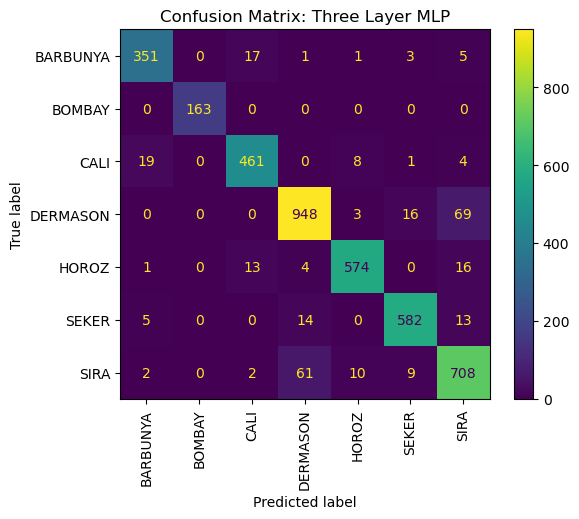


 Loss:


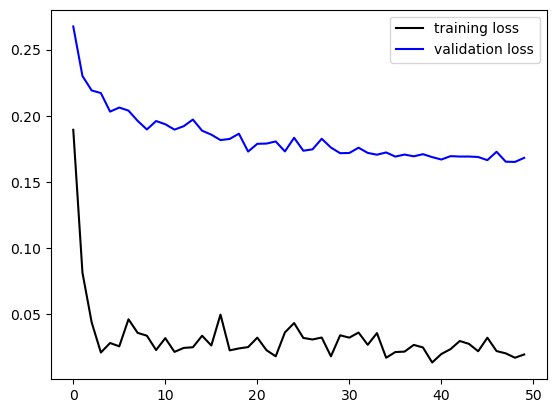

In [65]:
evaluate_model(dry_bean_MLP_model, losses, test_dataloader)

# **6. Convert output of the best model into CSV**

**Best Model: Support Vector Machine**

In [60]:
df_automatic_detection_output = pd.DataFrame({'Index':test_set_ids, 'Output':best_pred})
df_automatic_detection_output['Output'] = df_automatic_detection_output['Output'].map(reverse_label_value_mapping)  
df_automatic_detection_output

,Index,Output
0,8916,SIRA
1,9797,SIRA
2,8135,SIRA
3,10268,DERMASON
4,10808,DERMASON
...,...,...
4079,10529,DERMASON
4080,9509,SIRA
4081,1173,SEKER
4082,10892,DERMASON


In [61]:
df_automatic_detection_output.to_csv('automatic_detection_output.csv', encoding='utf-8', index=False)